# Project Title - Restaurants in Bengaluru using zomato dataset


The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the aggregate rating of each restaurant, establishment of different types of restaurant at different places, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has'nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don't have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location. What kind of a food is more popular in a locality. Do the entire locality loves vegetarian food. If yes then is that locality populated by a particular sect of people for eg. Jain, Marwaris, Gujaratis who are mostly vegetarian. These kind of analysis can be done using the data, by studying different factors.

## Downloading the Dataset

I found this raw dataset in kaggle :https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants
The data was in csv format.
Use the urlretrieve function from the urllib.request to download CSV files from a raw URL
Use a helper library, e.g., opendatasets, which contains a collection of curated datasets and provides a helper function for direct download.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./zomato-bangalore-restaurants" (use force=True to force download)


The dataset has been downloaded and extracted.

In [4]:
data_dir = './zomato-bangalore-restaurants'

In [5]:
import os
os.listdir(data_dir)

['zomato.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "zerotopandas-course-project-zomato-bangalore"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

<IPython.core.display.Javascript object>

In [70]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "murale1/zerotopandas-course-project-zomato-bangalore" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore


'https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore'

## Data Preparation and Cleaning

Let's load the CSV files using the Pandas library. We'll use the name data for the data frame to indicate this is unprocessed data that we might clean, filter, and modify to prepare a data frame ready for analysis.



In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('./zomato-bangalore-restaurants/zomato.csv')

In [3]:
data.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


Let's view some basic information about the data frame.

In [4]:
data.shape

(51717, 17)

This dataset contains 51717 rows and 17 columns. May this rows has  some duplicates which would we remove them in subsequenent process. And the some columns in the data was irrelavant to the analysis so it should be removed to make this data clean.

In [5]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Here the dataset has some irrelevant columns which was not related to our analysis it should be excluded from the dataset.Url,address,phone,review_list are not so important for our analysis so it should be removed.

In [6]:
zomato_df=data.drop(['url','address','phone','reviews_list'],axis=1)

In [7]:
zomato_df

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,"1,500",[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,"2,000",[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",[],Pubs and bars,Whitefield


In [8]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51371 non-null  object
 10  menu_item                    51717 non-null  object
 11  listed_in(type)              51717 non-null  object
 12  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(12)
memory 

Here u see it has 13 columns. we should rename the column so use it in our analysis easily.

In [9]:
zomato_df=zomato_df.rename(columns={"name":'Name','rate':'Ratings','votes':'Votes','rest_type':'Rest_Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City','online_order':'Takes_online_orders','book_table':'Has_table_booking'})

Most columns have the data type object, either because they contain values of different types or contain empty values (NaN). It appears that every column contains some empty values since the Non-Null count for some column is lower than the total number of rows (51717). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

Only one of the columns were detected as numeric columns (votes), Cost column have mostly numeric values. It has some unwanted character so it should be removed. So define a function to remove the ',' character into empty spaces and data returned will be converted into float data type in the function itself.

In [10]:
zomato_df["Cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [11]:
def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
zomato_df['Cost'] = zomato_df['Cost'].apply(cost)

In [12]:
zomato_df['Cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

Dataset has some duplicated values.It should be dropped from the dataset to do further analysis.

In [13]:
df_duplicates=zomato_df.duplicated()
zomato_df[df_duplicates]

,Name,Takes_online_orders,Has_table_booking,Ratings,Votes,location,Rest_Type,dish_liked,Cuisines,Cost,menu_item,Type,City
596,My Tea House,Yes,Yes,NEW,0,Banashankari,Casual Dining,NaN,"Continental, Asian, North Indian, Tea",500.0,"['MTH Signature Soup', 'Minestrone Veg', 'Broc...",Dine-out,Banashankari
2235,Shiv Sagar,No,No,3.6/5,10,Bannerghatta Road,Food Court,NaN,"South Indian, Beverages",400.0,[],Dine-out,Bannerghatta Road
3763,The Fisherman's Wharf,Yes,Yes,4.4/5,4099,Sarjapur Road,"Casual Dining, Bar","Sea Food, Caesar Salad, Jumbo Prawns, Cocktail...","Seafood, Goan, North Indian, Continental, Asian",1400.0,[],Buffet,Bellandur
4339,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,NaN,Biryani,400.0,[],Delivery,Bellandur
4949,OPUS Club,No,Yes,4.4/5,1496,Sarjapur Road,Pub,"Biryani, Cocktails, Nachos, Mocktails, Long Is...","Continental, Italian, North Indian, Mexican",1900.0,[],Drinks & nightlife,Bellandur
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49193,Sri Ganesh Juice Junction,Yes,No,3.5 /5,6,Bellandur,Beverage Shop,NaN,"Juices, Fast Food",200.0,[],Delivery,Sarjapur Road
49432,Biryani Treat,No,No,NaN,0,Bellandur,Quick Bites,NaN,Biryani,400.0,[],Delivery,Sarjapur Road
50379,House Of Candy,Yes,No,NaN,0,Whitefield,Confectionery,NaN,Desserts,200.0,[],Delivery,Whitefield
50405,House Of Candy,Yes,No,NaN,0,Whitefield,Confectionery,NaN,Desserts,200.0,[],Delivery,Whitefield


87 duplicated rows are found so it should be removed from the dataset.

In [14]:
import jovian

<IPython.core.display.Javascript object>

In [15]:
zomato_df.drop_duplicates()

,Name,Takes_online_orders,Has_table_booking,Ratings,Votes,location,Rest_Type,dish_liked,Cuisines,Cost,menu_item,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,Whitefield,Bar,NaN,Continental,1500.0,[],Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,600.0,[],Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,Whitefield,Bar,NaN,Finger Food,2000.0,[],Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,[],Pubs and bars,Whitefield


In [16]:
import re

In [17]:
def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)
zomato_df['Name'] = zomato_df['Name'].apply(lambda x: name_clean(x))

In [18]:
zomato_df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In 'Ratings' column it was noted as '4.1/5' .Here '/5' is unwanted data for further analysis. So it should be removed.

In [19]:
import numpy as np

In [20]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)

zomato_df["Ratings"]=zomato_df["Ratings"].apply(lambda x: handlerate(x))


In [21]:
zomato_df["Ratings"].isna().sum()

10052

'Ratings' column has 'NAN' values. By using sns heatmap we visualize the 'Nan' values in the column.

In [22]:
import seaborn as sns

<AxesSubplot:>

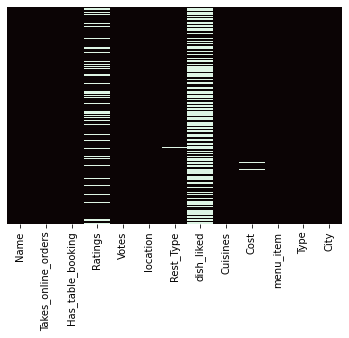

In [23]:
sns.heatmap(zomato_df.isnull(),yticklabels=False,cbar=False,cmap='mako')

By looking the visual we can see rating, dish_liked, cost,rest type has null values. Either it should be droped or it will get replaced by particular column's mean and medium values

In [24]:
zomato_df=zomato_df.dropna()

In [25]:
zomato_df.isnull().sum()

Name                   0
Takes_online_orders    0
Has_table_booking      0
Ratings                0
Votes                  0
location               0
Rest_Type              0
dish_liked             0
Cuisines               0
Cost                   0
menu_item              0
Type                   0
City                   0
dtype: int64

In [26]:
rest_types = zomato_df['Rest_Type'].value_counts(ascending  = False)
rest_types

Casual Dining                7331
Quick Bites                  5253
Cafe                         2375
Dessert Parlor               1083
Casual Dining, Bar            985
                             ... 
Bar, Pub                        5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: Rest_Type, Length: 73, dtype: int64

In [27]:
rest_types_lessthan1000 = rest_types[rest_types<1000]

In [28]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
zomato_df['Rest_Type'] = zomato_df['Rest_Type'].apply(handle_rest_type)
zomato_df['Rest_Type'].value_counts()

Casual Dining     7331
others            7217
Quick Bites       5253
Cafe              2375
Dessert Parlor    1083
Name: Rest_Type, dtype: int64

In [29]:
zomato_df.isnull().sum()

Name                   0
Takes_online_orders    0
Has_table_booking      0
Ratings                0
Votes                  0
location               0
Rest_Type              0
dish_liked             0
Cuisines               0
Cost                   0
menu_item              0
Type                   0
City                   0
dtype: int64

In [30]:
zomato_df.dtypes

Name                    object
Takes_online_orders     object
Has_table_booking       object
Ratings                float64
Votes                    int64
location                object
Rest_Type               object
dish_liked              object
Cuisines                object
Cost                   float64
menu_item               object
Type                    object
City                    object
dtype: object

In [31]:
df=zomato_df.copy()
df.sample(5)

,Name,Takes_online_orders,Has_table_booking,Ratings,Votes,location,Rest_Type,dish_liked,Cuisines,Cost,menu_item,Type,City
24316,Eat Well,Yes,No,3.6,113,Banaswadi,others,Panneer Butter Masala,North Indian,400.0,[],Delivery,Kalyan Nagar
13340,ThrowBack Pub Dine,No,No,3.9,234,Langford Town,others,"Cocktails, Pizza, French Fries","Italian, North Indian, Continental",1000.0,[],Pubs and bars,Church Street
34102,Cafemoto,Yes,No,4.0,201,Koramangala 5th Block,Cafe,"Burgers, Chicken Burger, Beef Burger, Mojito, ...","Cafe, Continental, Italian, Burger",800.0,[],Dine-out,Koramangala 6th Block
4602,BISO Citrus Hotels,No,No,3.0,120,Bellandur,Casual Dining,"Salads, Gulab Jamun, Pasta, Fish, Rasgulla, Co...","North Indian, Italian, Chinese, Asian",1000.0,[],Dine-out,Bellandur
32082,Jimis Beer Cafe,No,No,3.8,674,Koramangala 6th Block,others,"Beer, Steak, Chilli Chicken, Burgers, Tandoori...","American, North Indian, Chinese",1700.0,[],Pubs and bars,Koramangala 5th Block


In [32]:
import jovian

In [34]:
project_name = "zerotopandas-course-project-zomato-bangalore"

In [35]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "murale1/zerotopandas-course-project-zomato-bangalore" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore


'https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore'

## Exploratory Analysis and Visualization



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [36]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [37]:
df.describe()

,Ratings,Votes,Cost
count,23259.000000,23259.000000,23259.000000
mean,3.905834,605.388710,753.585279
std,0.426071,1113.483548,520.495760
min,1.800000,0.000000,40.000000
25%,3.800000,104.000000,400.000000
50%,4.000000,225.000000,600.000000
75%,4.200000,597.000000,1000.000000
max,4.900000,16832.000000,6000.000000


By using this describe method, mean,min,max,count value of numerical column are found out. As we analysis this Rating for the restaurants in bangalore receives close to 4.

### Restaurants Rating using Pie Chart

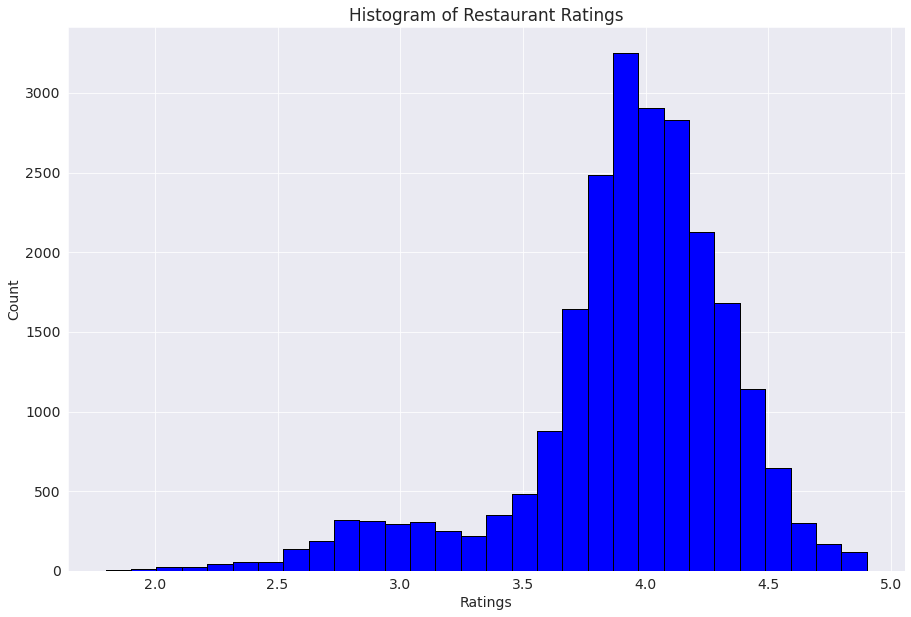

In [38]:
data = zomato_df['Ratings'].dropna()

plt.figure(figsize=(15, 10))

# Matplotlib histogram
plt.hist(data, color='blue', edgecolor='black', bins=30)

# Seaborn histogram
sns.histplot(data, kde=False, color='blue', bins=30, edgecolor='black')

# Add labels
plt.title('Histogram of Restaurant Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')

plt.show()

The histogram  plot generated from the dataset show that there is a peak in the frequency of ratings within the 3.5 to 4.5 range. This indicates that a significant number of restaurants in Bangalore have received ratings within this range. 

### Most popular cuisines in Bangalore

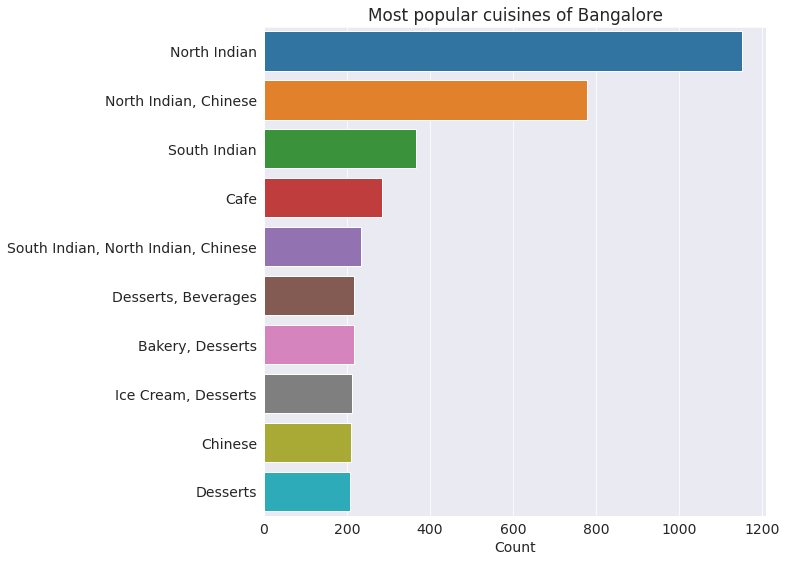

In [39]:
plt.figure(figsize=(9, 9))
Cuisines = df['Cuisines'].value_counts()[:10]
sns.barplot(x=Cuisines, y=Cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")
plt.show()

### Number of restaurents  at Bangalore in particular location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'Jayanagar'),
  Text(3, 0, 'Kumaraswamy Layout'),
  Text(4, 0, 'Rajarajeshwari Nagar'),
  Text(5, 0, 'Mysore Road'),
  Text(6, 0, 'Uttarahalli'),
  Text(7, 0, 'South Bangalore'),
  Text(8, 0, 'Vijay Nagar'),
  Text(9, 0, 'Bannerghatta Road'),
  Text(10, 0, 'JP Nagar'),
  Text(11, 0, 'BTM'),
  Text(12, 0, 'Wilson Garden'),
  Text(13, 0, 'Koramangala 5th Block'),
  Text(14, 0, 'Shanti Nagar'),
  Text(15, 0, 'Richmond Road'),
  Text(16, 0, 'City Market'),
  Text(17, 0, 'Bellandur'),
  Text(18, 0, 'Sarjapur Road'),
  Text(1

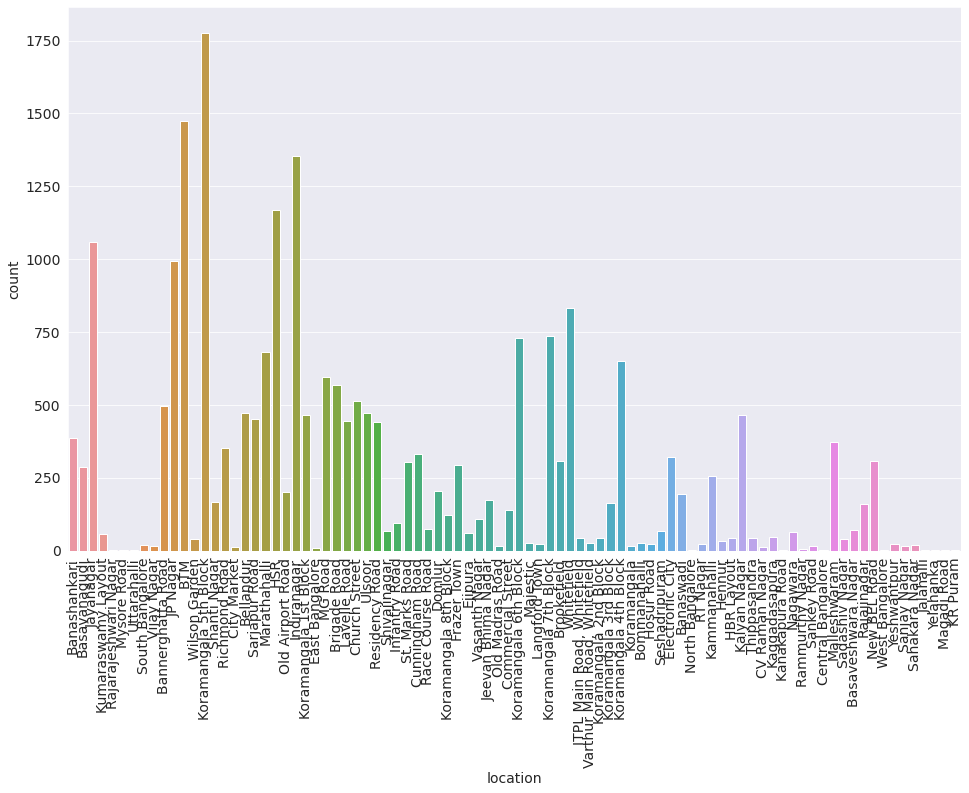

In [40]:
plt.figure(figsize = (16,10))
ax = sns.countplot(data=df, x=df['location'])
plt.xticks(rotation=90) #for clear x axis


### Fraction of Delivery and Book Table

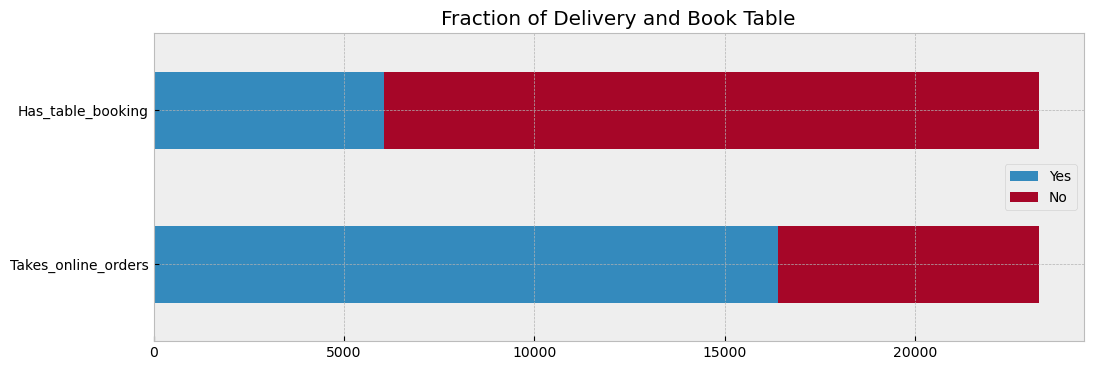

In [41]:
with plt.style.context('bmh', after_reset = True):
    plt.figure(figsize = (12,4))
    ax = plt.subplot(1,1,1)
    tmp = {}
    for col in ['Takes_online_orders', 'Has_table_booking']: 
        tmp[col] = zomato_df[col].value_counts()
    tmp = pd.DataFrame.from_dict(tmp, orient = 'index')
    tmp.plot.barh(stacked = True, ax = ax)
    ax.set_title('Fraction of Delivery and Book Table')
    plt.show()

Bangalore restaurant takes more online order  and  has less booking facilities for dining.

Let us save and upload our work to Jovian before continuing

In [42]:
import jovian

In [43]:
project_name = "zerotopandas-course-project-zomato-bangalore"

In [44]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "murale1/zerotopandas-course-project-zomato-bangalore" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore


'https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore'

## Asking and Answering Questions



#### Q1:  Which Location has More Positive  rated Restaurants in Bangalore?

In [45]:
b=df[df.Ratings>4]
b.sample(5)

,Name,Takes_online_orders,Has_table_booking,Ratings,Votes,location,Rest_Type,dish_liked,Cuisines,Cost,menu_item,Type,City
11544,Olive Bar And Kitchen,No,Yes,4.5,2198,Richmond Road,Casual Dining,"Salads, Cocktails, Hazelnut Cake, Pepperoni Pi...","Mediterranean, European, Salad",1800.0,[],Buffet,Church Street
6612,The Biere Club,Yes,Yes,4.3,3484,Lavelle Road,others,"Wheat Beer, Pizza, Cocktails, Virgin Sangria, ...","Continental, BBQ, Finger Food",1700.0,[],Drinks & nightlife,Brigade Road
11673,Infinitea Tea Room Tea Store,Yes,Yes,4.3,860,Cunningham Road,others,"Tea, Momos, Tiramisu, Sandwiches, Pesto Pasta,...","Continental, Cafe, Desserts, Salad, Momos",1000.0,[],Cafes,Church Street
46380,Clean Slate Cafe,Yes,No,4.1,274,Malleshwaram,Cafe,"Fries, Burgers, Peri Peri Potato Wedge, Pasta ...","Cafe, Continental, Italian",600.0,[],Delivery,Rajajinagar
15611,The Grill House,Yes,Yes,4.1,765,Ulsoor,others,"Steak, Burgers, Cocktails, Beer, Buffalo Wings...","American, Mexican, Italian, Steak",1200.0,[],Dine-out,Frazer Town


In [46]:
high_rated_df=b.City.value_counts().sort_values(ascending=False)

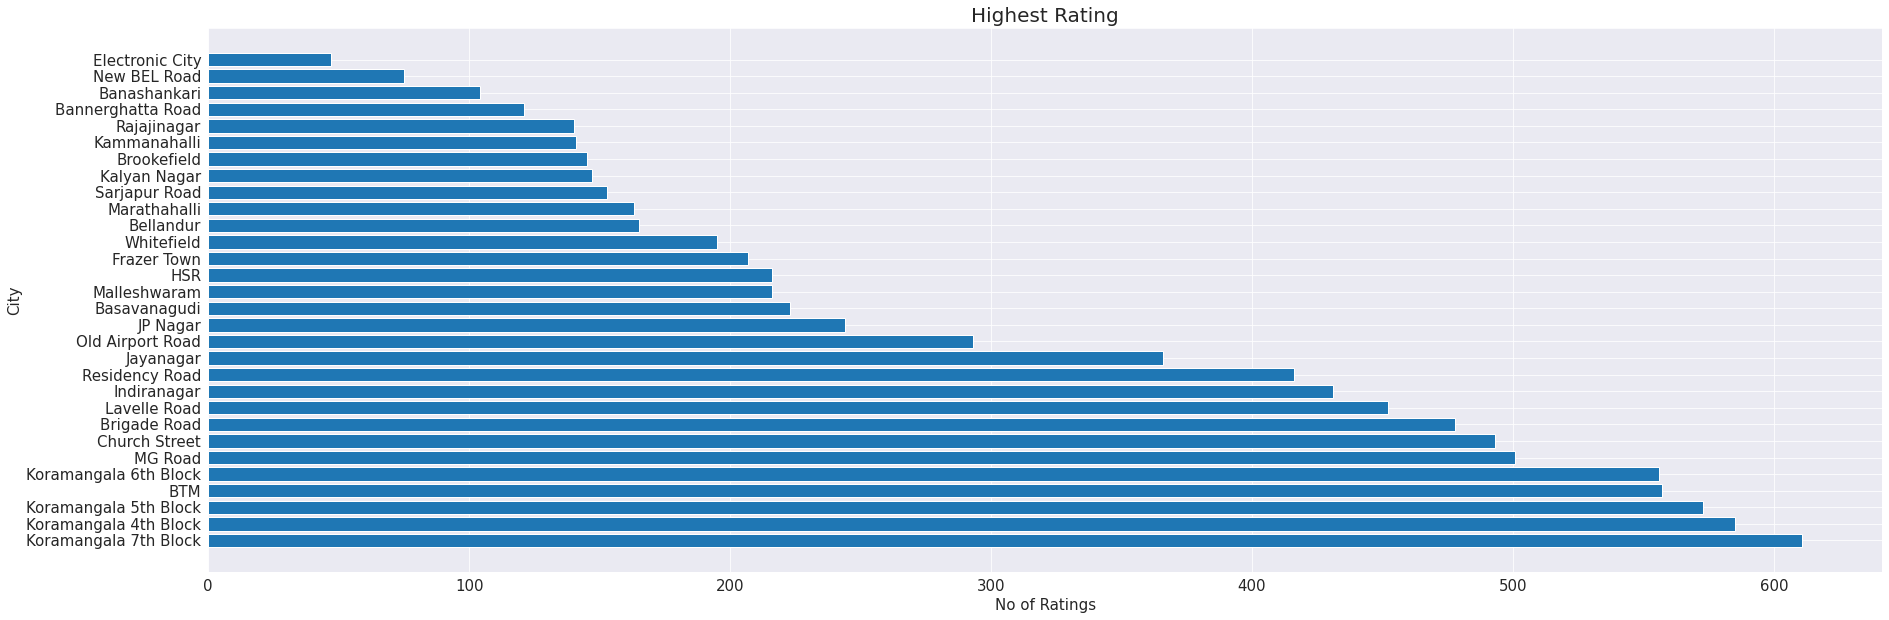

In [47]:
plt.figure(figsize=(30,10))
plt.barh(high_rated_df.index,high_rated_df.values)
plt.xlabel('No of Ratings',size=15)
plt.ylabel('City',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Highest Rating',size=20)
plt.show()

Upon analyzing the dataset, it was observed that Koramangala 7th Block has the largest number of highly rated restaurants compared to other areas in Bangalore. This indicates that Koramangala 7th Block is a popular destination for food enthusiasts and offers a wide range of establishments that have received positive ratings from customers.

#### Q2: What is Top restaurant Chain in Bangalore?

In [48]:
df['Name']

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51705                                   Izakaya Gastro Pub
51707           M Bar  Bengaluru Marriott Hotel Whitefield
51708                                Keys Cafe  Keys Hotel
51711                                              Bhagini
51715    Chime  Sheraton Grand Bengaluru Whitefield Hotel 
Name: Name, Length: 23259, dtype: object

Text(0.5, 0, 'Number of outlets')

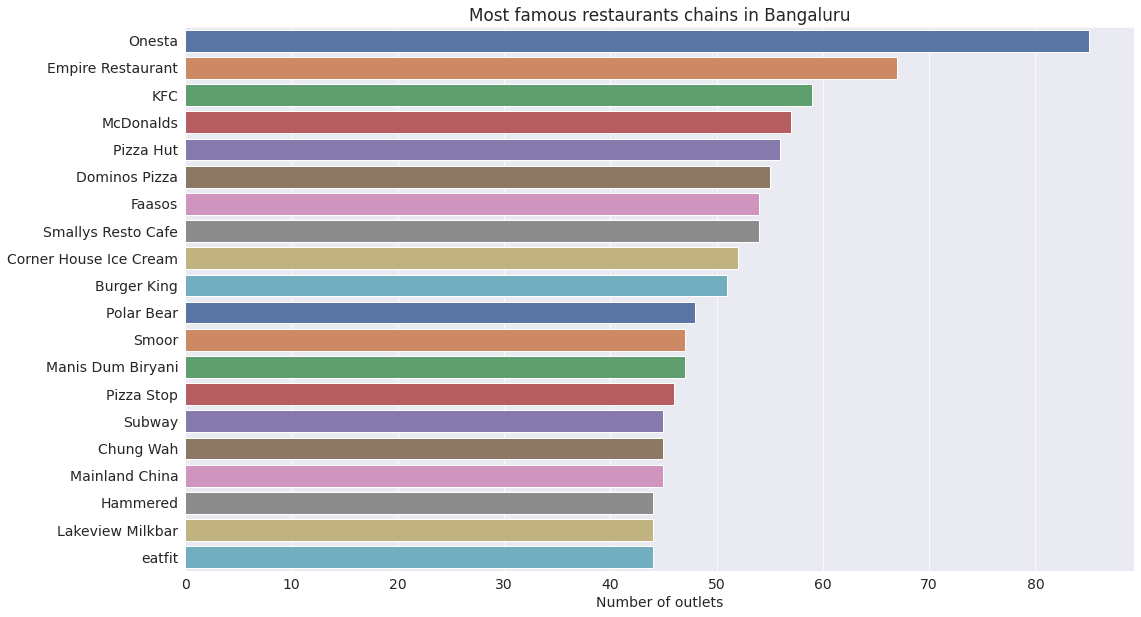

In [49]:
plt.figure(figsize=(17,10))
chains=df['Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")

based on the analysis of the dataset, Onesta, Empire Restaurant, and KFC are among the most famous restaurant chains in Bangalore. These chains have earned their reputation through a combination of factors, including a strong presence across the city, positive customer ratings, and a wide customer base.

#### Q3: Which Type of Food liked by most people in Bangalore?

In [50]:
import re
df=df[df['dish_liked'].notnull()]
df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    splited_array=re.split(',',df['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

In [51]:
print("Count of Most liked dishes of Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(20)

Count of Most liked dishes of Bangalore


 Pasta              2695
 Pizza              1916
 Cocktails          1882
 Burgers            1738
 Mocktails          1623
 Biryani            1309
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1171
 Fish               1118
 Paratha            1108
 Salads             1057
 Chicken Biryani    1004
Cocktails            891
 Fries               877
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
dtype: int64

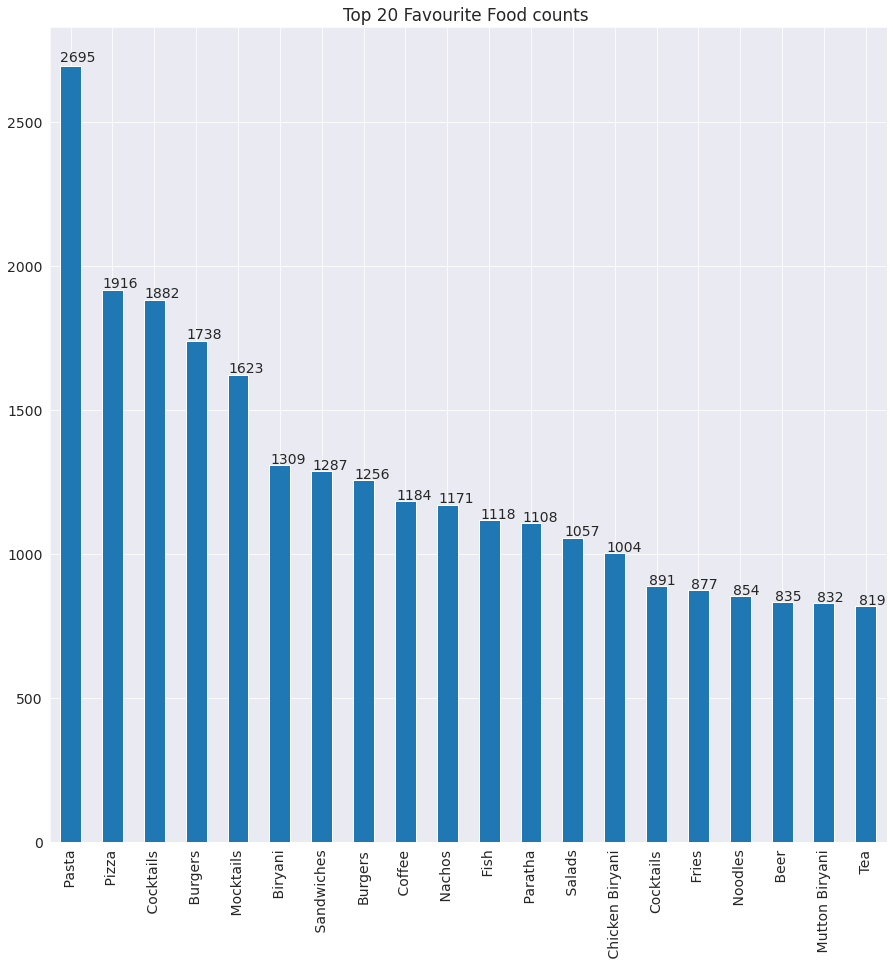

In [52]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(15,15),title = 'Top 20 Favourite Food counts ')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Based on these observations, it can be inferred that pasta, pizza, and cocktails are among the most favorite food choices in Bangalore. Diners in the city often seek out restaurants that offer quality pasta and pizza dishes, as well as a selection of well-crafted cocktails.

#### Q4: Which location has highest number of restraurants in Bangalore?

<AxesSubplot:xlabel='location'>

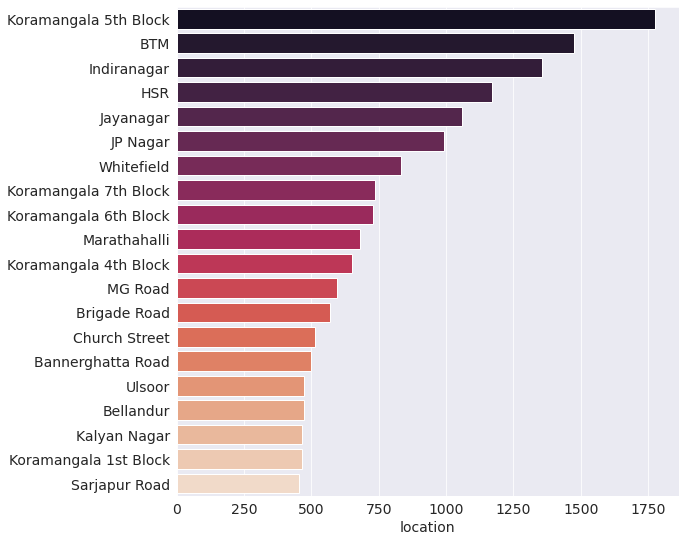

In [53]:
plt.figure(figsize=(9,9))
Rest_locations = df['location'].value_counts()[:20]
sns.barplot(x=Rest_locations, y=Rest_locations.index, palette="rocket")

The high number of restaurants in Koramangala 5th Block suggests that this particular block is a bustling culinary hub within Koramangala. It offers a wide range of dining options, catering to different cuisines and preferences. Residents and visitors in the area have a multitude of choices when it comes to exploring various culinary experiences.

#### Q5: Which location has most expensive and most affortable cost in Bangalore?

In [54]:
df2=df.groupby("location")[["Cost"]].mean()
df3=df2.sort_values(by="Cost",ascending=False).head()
df3.style.background_gradient(cmap="YlOrRd",high=0.5)

,Cost
location,
Sankey Road,2802.941176
MG Road,1472.063758
Lavelle Road,1425.672646
Race Course Road,1284.000000
Infantry Road,1187.368421


<AxesSubplot:xlabel='location'>

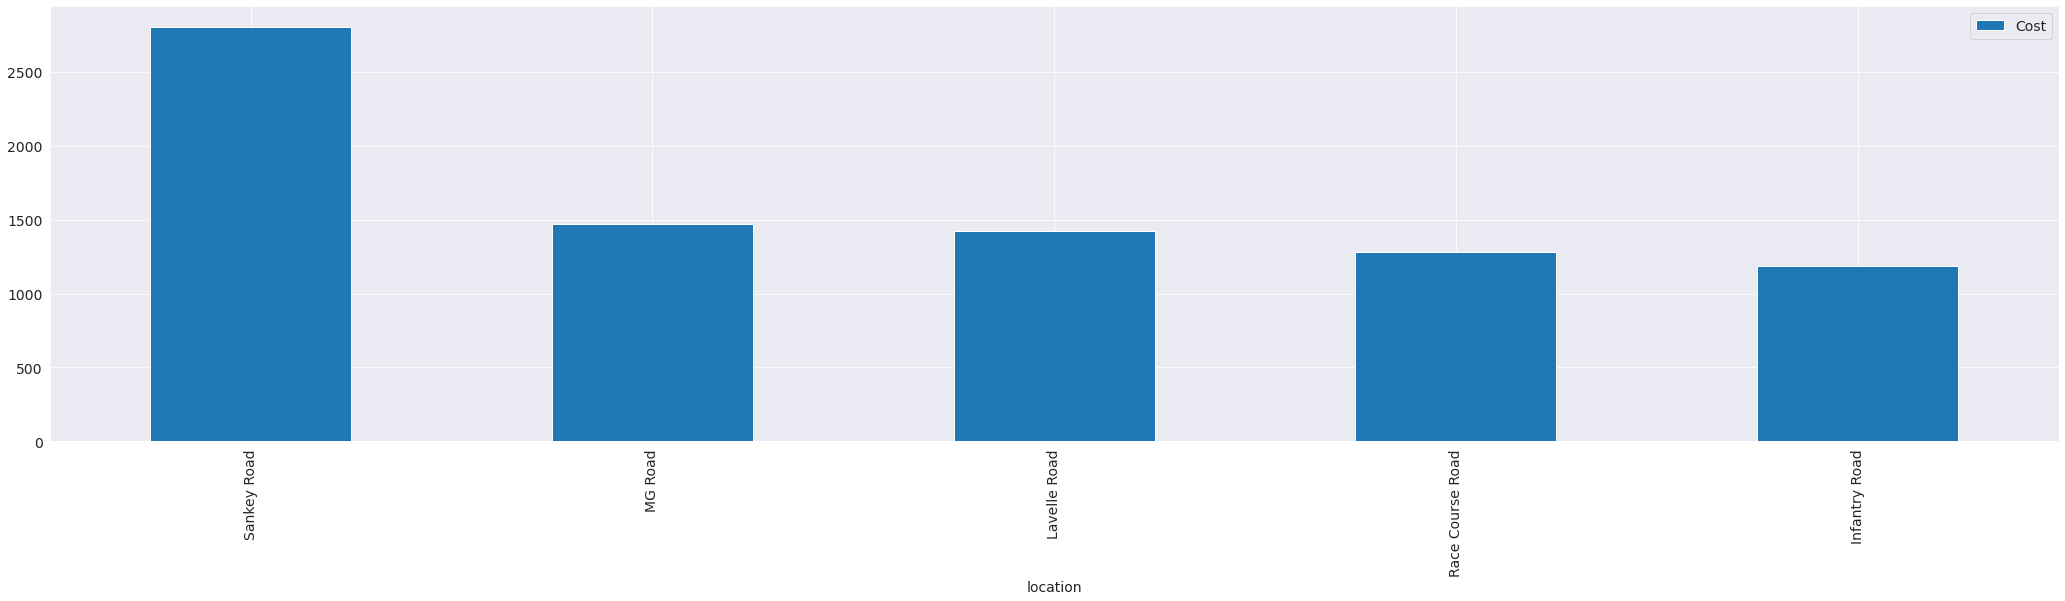

In [55]:
df3.plot(kind = 'bar', figsize = (36,8))

If you are looking for a location in Bangalore that offers upscale and expensive dining experiences, Sankey Road emerges as the most prominent choice based on the dataset analysis

In [56]:
df4=df.groupby("location")[["Cost"]].mean().sort_values(by="Cost").head()
df4.style.background_gradient(cmap="YlOrRd",high=0.5)

,Cost
location,
KR Puram,300.000000
Hosur Road,327.083333
Yelahanka,350.000000
Sanjay Nagar,373.529412
Ejipura,377.966102


<AxesSubplot:xlabel='location'>

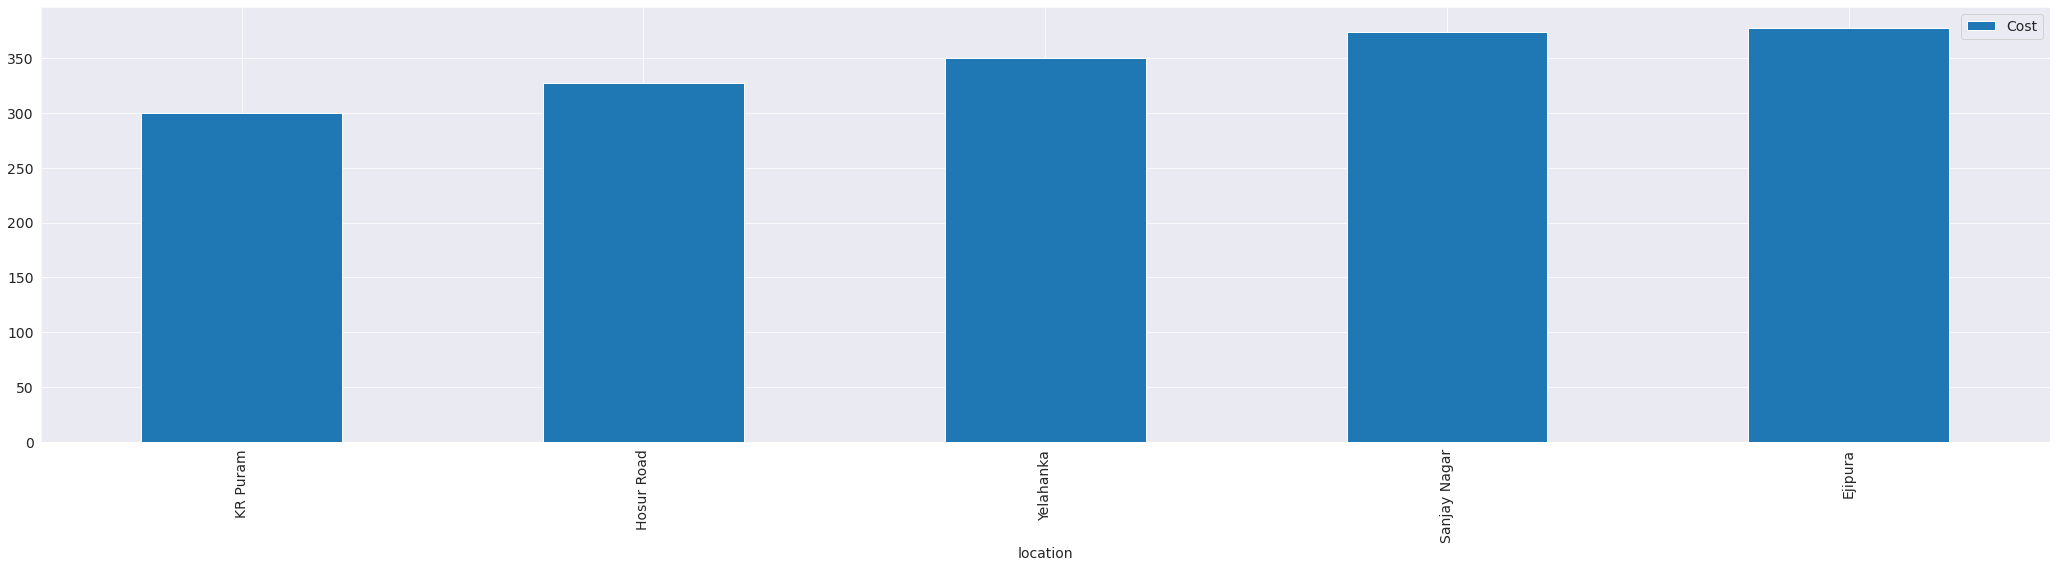

In [57]:
df4.plot(kind = 'bar', figsize = (36,8))

It was found that the average price range or cost of dining at restaurants in KR Puram is relatively lower compared to other locations in Bangalore.The affordability of restaurants in KR Puram suggests that this particular area offers budget-friendly dining options. It is likely to have a range of restaurants that cater to customers looking for more economical dining experiences.

Let us save and upload our work to Jovian before continuing.

In [64]:
import jovian

In [58]:
project_name = "zerotopandas-course-project-zomato-bangalore"

In [59]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "murale1/zerotopandas-course-project-zomato-bangalore" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore


'https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore'

## Inferences and Conclusion

Based on the provided information, the conclusions and inferences that can be drawn are as follows:

1. **Popular Cuisines**: The most popular cuisines in Bangalore are North Indian, followed by Chinese and South Indian.

2. **Restaurant Concentration**: Koramangala 5th Block has the highest number of restaurants, making it a vibrant culinary hub in the area, offering diverse dining options.

3. **Ratings Frequency**: Restaurants in Bangalore tend to receive ratings mostly within the 3.5 to 4.5 range, indicating a generally positive dining experience.

4. **Dining Trends**: Bangaloreans have a preference for pasta, pizza, and cocktails as their favorite food choices.

5. **Online Ordering**: Bangalore restaurants are more focused on catering to online orders rather than offering extensive booking facilities for dining in.

6. **Highly Rated Restaurants**: Koramangala 7th Block stands out as an area with the largest number of highly rated restaurants in Bangalore, indicating a concentration of quality dining establishments.

7. **Famous Restaurant Chains**: Onesta, Empire Restaurant, and KFC are among the most well-known restaurant chains in Bangalore.

8. **Upscale Dining**: Sankey Road is the prominent choice for those seeking upscale and expensive dining experiences in Bangalore.

9. **Affordable Dining**: KR Puram offers a relatively lower average price range or cost of dining compared to other locations in Bangalore.

In summary, Bangalore is a diverse culinary city with a strong presence of North Indian, Chinese, and South Indian cuisines. Koramangala 5th Block and 7th Block are significant areas for restaurant choices, with the latter standing out for highly rated establishments. Online ordering is more prevalent than booking for dining in, and pasta, pizza, and cocktails are popular food choices. Sankey Road offers upscale dining experiences, while KR Puram is known for its more affordable dining options.

In [60]:
import jovian

In [61]:
project_name = "zerotopandas-course-project-zomato-bangalore"

In [62]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "murale1/zerotopandas-course-project-zomato-bangalore" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore


'https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore'

In [63]:
import jovian

In [64]:
project_name = "zerotopandas-course-project-zomato-bangalore"

In [66]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "murale1/zerotopandas-course-project-zomato-bangalore" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore


'https://jovian.com/murale1/zerotopandas-course-project-zomato-bangalore'